findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not foun

总节点数 115


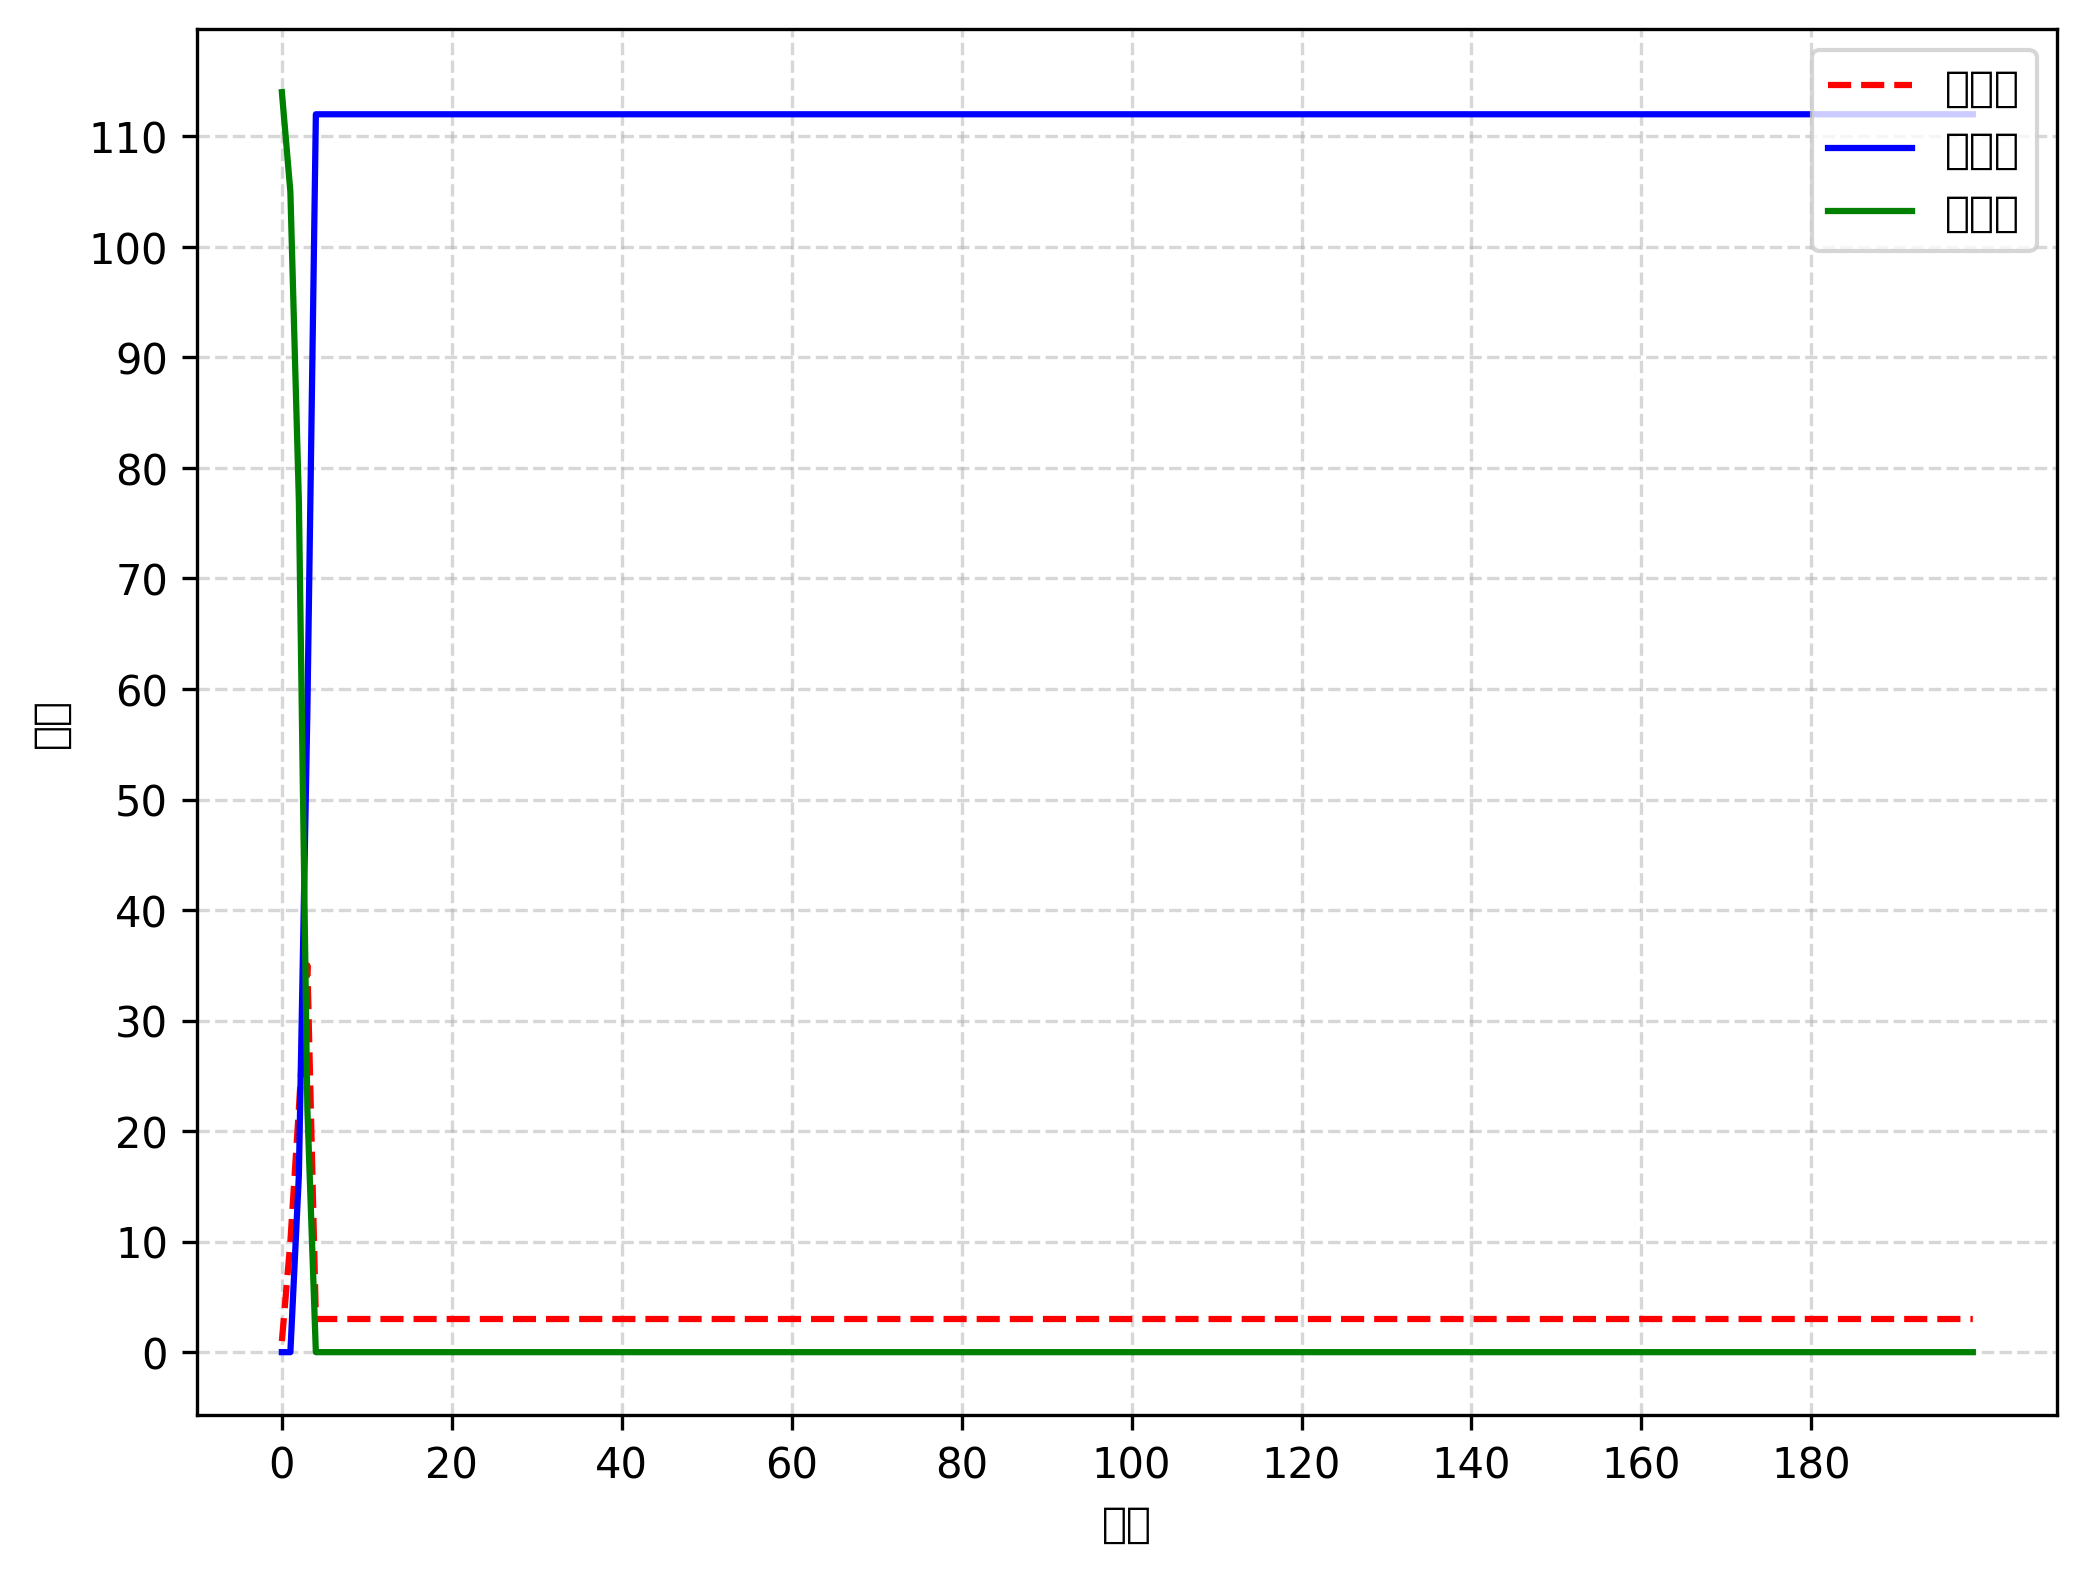

In [3]:
import io
import random
import urllib.request as urllib
import zipfile

import matplotlib.pyplot as plt
import networkx as nx
import numpy as np

'''
author：xiao黄
time：2020-9-26
'''

'''
1 易感人群（Susceptible）：指未得病者，但缺乏免疫能力，与感病者接触后容易受到感染。
2 感染人群（Infective）：指染上传染病的人，他可以传播给易感人群。
3 移除人群（Removed）：被移出系统的人。因病愈（具有免疫力）或死亡的人。这部分人不再参与感染和被感染过程。
N(t) = S(t) + I(t) + R(t)
S(t+1) = S(t) - αS(t)
I(t+1) = I(t) - βI(t)
R(t+1) =  R(t) + βI(t)
'''

max_iter_num = 200 # 模拟的次数
# G = nx.karate_club_graph() # 空手道俱乐部

# 足球数据集
url = "http://www-personal.umich.edu/~mejn/netdata/football.zip"
sock = urllib.urlopen(url)  
s = io.BytesIO(sock.read())  
sock.close()
zf = zipfile.ZipFile(s)  
gml = zf.read("football.gml").decode()  
gml = gml.split("\n")[1:]
G = nx.parse_gml(gml) 

nums = G.number_of_nodes() # 足球数据节点 -> 115
print('总节点数',nums)

alpha = 0.25 # 传染概率
beta = 0.65 # 治愈概率

for edge in G.edges:
    G.add_edge(edge[0], edge[1], weight=random.uniform(0,1)) # 可不可以作为权值 病毒的感染能力
for node in G:
    G.add_node(node, state = 0) # 用state标识状态 state=0 易感 ，state=1 感染 ， state=2 治愈

seed = 'Arkansas' # 选定Arkansas作为传染源
G.nodes[seed]['state'] = 1 # 表示Arkansas是感染的 

all_infect_nodes = [] # 所有被感染的节点放在这里
all_infect_nodes.append(seed)

all_remove_nodes = [] # 所有被治愈的节点放在这里

infect = [] # 随着迭代次数的增加的感染总人数
recover = [] # 随着迭代次数的增加的治愈总人数

for i in range(max_iter_num):
    new_infect = list() # 新被感染的
    new_remove = list() # 新被治愈的
    # t1 = '%s time' % i + ' %s nodes' % len(all_infect_nodes)
    # print('当前感染节点数：', t1) # 当前有多少个节点被感染
    # t2 = '%s time' % i + ' %s nodes' % len(all_remove_nodes)
    # print('治愈节点数：', t2)
    infect.append(len(all_infect_nodes))
    recover.append(len(all_remove_nodes))
    
    # 感染的机会不止一次
    # 治愈后不会被感染
    for v in all_infect_nodes:

        for nbr in G.neighbors(v): # v的邻居
            if G.nodes[nbr]['state'] == 1: # 被感染
                edge_data = G.get_edge_data(v, nbr) # 得到边的权值
                if beta > edge_data['weight']: # 治愈概率
                    G.nodes[nbr]['state'] == 2 # 
                    if nbr not in all_remove_nodes:
                        new_remove.append(nbr)

            if G.nodes[nbr]['state'] == 0 :# 如果这个邻居节点没被感染且没有被治愈
                edge_data = G.get_edge_data(v, nbr)
                if alpha < edge_data['weight']:
                    G.nodes[nbr]['state'] = 1
                    new_infect.append(nbr)

    for i in new_remove:
        if i in new_infect:
            new_infect.remove(i)
        if i in all_infect_nodes: 
            all_infect_nodes.remove(i)
    
    all_infect_nodes.extend(new_infect) # 将新感染的添加到
    all_remove_nodes.extend(new_remove)
    all_infect_nodes = list(set(all_infect_nodes)) # 去重
    all_remove_nodes = list(set(all_remove_nodes))


# matplotlib中文支持
plt.rcParams['font.sans-serif'] = ['SimHei']  #aaaaa.py 步骤一（替换sans-serif字体）
plt.rcParams['axes.unicode_minus'] = False  # 步骤二（解决坐标轴负数的负号显示问题）

def draw_picture(nums,max_iter_num,infect,recover):
    x = range(max_iter_num)  
    susceptible =  []
    for i in range(max_iter_num):
        susceptible.append(nums - infect[i] - recover[i])

    plt.figure(figsize=(8,6), dpi=300) # 图片大小，清晰度
    
    plt.plot(x,infect, color='r', label='感染数', linestyle='--',)
    plt.plot(x,recover, color='b', label='治愈数') # 可以修改颜色、线条风格、图例
    plt.plot(x,susceptible,color='g',label='易感数')

    plt.legend(loc='upper right') # 显示图例

    plt.xticks(range(0,max_iter_num,20)) # 修改x的刻度
    plt.yticks(range(0,nums,10)) # 修改y的刻度

    # 添加网格显示
    plt.grid(True, linestyle='--', alpha=0.5)

    # 添加x，y轴描述信息及标题
    plt.ylabel('数量')
    plt.xlabel('天数')

    # plt.title('对比')

    plt.show()

draw_picture(nums,max_iter_num,infect,recover)
